In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
Trip_Data = pd.read_csv("Trip_data.csv")
Pricing = pd.read_csv("Pricing.csv")
Drivers = pd.read_csv("Drivers.csv")
Trip_Data.head()
Drivers.head() 

,City,Car type,Active captains
0,Dubai,Economy,20
1,Dubai,Business,30
2,Dubai,First,1
3,Jeddah,Economy,40
4,Jeddah,Business,5


In [4]:
Trip_Data.dtypes

Trip ID                                  int64
Trip date and time                      object
City                                    object
Car type                                object
Available cars at time of booking        int64
Trip duration (mins)                     int64
Distance travelled (km)                float64
Wait time at pickup (mins)               int64
Trip price (in local currency)         float64
driver earnings (in local currency)    float64
Payment method                          object
dtype: object

In [5]:
Trip_Data["Trip_datetime"]=pd.to_datetime(Trip_Data["Trip date and time"], format = "%d/%m/%Y %H:%M")

In [20]:
Trip_Data.Trip_date.max()

Timestamp('2022-09-15 03:56:00')

In [6]:
Trip_Data["Trip_Day"]=Trip_Data.Trip_datetime.dt.date

In [7]:
Trip_Data["Trip_Hour"]=Trip_Data.Trip_datetime.dt.hour

In [8]:
Trip_Data["Trip_DOW"]=Trip_Data.Trip_datetime.dt.day_name()

In [9]:
Trip_Data["GoCarzz_Earning"] = Trip_Data["Trip price (in local currency)"]-Trip_Data["driver earnings (in local currency)"]

In [11]:
Trip_Data['Trip_Count']=1

In [12]:
Trip_Data.head()

,Trip ID,Trip date and time,City,Car type,Available cars at time of booking,Trip duration (mins),Distance travelled (km),Wait time at pickup (mins),Trip price (in local currency),driver earnings (in local currency),Payment method,Trip_datetime,Trip_Day,Trip_Hour,Trip_DOW,GoCarzz_Earning,Trip_Count
0,1,01/09/2022 4:12,Dubai,Economy,1,7,4.25,16,34.56,31.96,GoCarzz credit,2022-09-01 04:12:00,2022-09-01,4,Thursday,2.60,1
1,2,01/09/2022 4:58,Jeddah,Economy,1,12,8.66,9,32.72,28.63,Credit card,2022-09-01 04:58:00,2022-09-01,4,Thursday,4.09,1
2,3,01/09/2022 5:03,Dubai,Economy,4,11,5.64,0,21.69,20.06,Cash,2022-09-01 05:03:00,2022-09-01,5,Thursday,1.63,1
3,4,01/09/2022 5:08,Dubai,Business,4,26,28.94,0,82.35,75.76,Credit card,2022-09-01 05:08:00,2022-09-01,5,Thursday,6.59,1
4,5,01/09/2022 5:10,Dubai,Business,2,10,12.46,10,56.15,51.65,Credit card,2022-09-01 05:10:00,2022-09-01,5,Thursday,4.50,1


### 1. What % of trips in Jeddah are SUV?

In [7]:
Trip_Data[Trip_Data.City=="Jeddah"]["Car type"].value_counts(normalize=True)*100

Economy     92.855287
Business     5.326059
SUV          1.766693
First        0.051962
Name: Car type, dtype: float64

#### 2.	What is the highest number of trips in any given day?

In [25]:
Trip_Data.groupby("Trip_Day")["Trip ID"].count().sort_values(ascending =False)

Trip_Day
2022-09-08    963
2022-09-07    751
2022-09-05    713
2022-09-14    701
2022-09-13    698
2022-09-06    696
2022-09-12    663
2022-09-11    653
2022-09-04    644
2022-09-01    625
2022-09-09    551
2022-09-10    507
2022-09-02    503
2022-09-03    440
2022-09-15     44
Name: Trip ID, dtype: int64

#### 3. What are the payment preferences for Economy and Business users in Dammam?

In [14]:
Trip_Data[(Trip_Data.City=="Dammam")&(Trip_Data["Car type"].isin(["Economy"]))]["Payment method"].value_counts()

Cash              1208
Credit card        221
GoCarzz credit       9
Name: Payment method, dtype: int64

In [15]:
Trip_Data[(Trip_Data.City=="Dammam")&(Trip_Data["Car type"].isin(["Business"]))]["Payment method"].value_counts()

Cash              37
Credit card       19
GoCarzz credit    10
Name: Payment method, dtype: int64

### 4.	For each city, which car type has the longest trips on average?

In [17]:
Trip_Data.groupby(["City","Car type"])["Trip duration (mins)"].mean().reset_index()

,City,Car type,Trip duration (mins)
0,Dammam,Business,42.621212
1,Dammam,Economy,21.237830
2,Dubai,Business,25.220942
3,Dubai,Economy,23.216981
4,Dubai,First,27.000000
5,Jeddah,Business,32.512195
6,Jeddah,Economy,23.127868
7,Jeddah,First,39.000000
8,Jeddah,SUV,33.102941


### 5.	What day of week is the least active?

C:\Users\junai\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


<AxesSubplot:xlabel='Trip_DOW'>

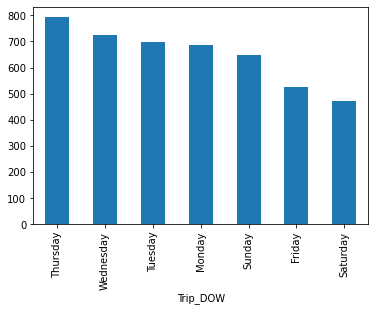

In [19]:
Trip_Data_Filterd =Trip_Data[Trip_Data.Trip_Day<pd.to_datetime('2022-09-15', format ="%Y-%m-%d")]
Trip_Data_Filterd.groupby(["Trip_Day","Trip_DOW"])["Trip_Count"].sum().reset_index().groupby('Trip_DOW')['Trip_Count'].mean().sort_values(ascending =False).plot(kind='bar')

### 6.	What are the peak hours?

Text(0, 0.5, 'Avg_Trip_Count')

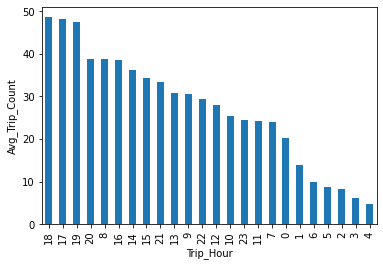

In [20]:
Trip_Data.groupby(["Trip_Day","Trip_Hour"])["Trip_Count"].sum().reset_index().groupby('Trip_Hour')['Trip_Count'].mean().sort_values(ascending =False).plot(kind='bar')
plt.ylabel('Avg_Trip_Count')

### 7.	If you can add 5 drivers to any given hour, which hour would you choose?

Text(0, 0.5, 'Available_Cars')

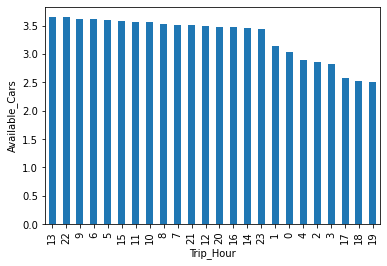

In [21]:
Trip_Data.groupby(["Trip_Hour"])["Available cars at time of booking"].mean().sort_values(ascending =False).plot(kind='bar')
plt.ylabel('Available_Cars')

<AxesSubplot:xlabel='Trip_Hour'>

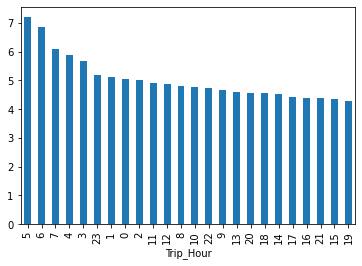

In [35]:
Trip_Data.groupby(["Trip_Hour"])["GoCarzz_Earning"].mean().sort_values(ascending =False).plot(kind='bar')

### 8.	For a Jeddah Economy driver, what is the expected change in his daily income if we give this driver a Business car instead?

In [23]:
trip_by_day=Trip_Data_Filterd.groupby(['City','Car type','Trip_Day']).agg({'driver earnings (in local currency)':'sum','Trip ID':'count'}).reset_index()
trip_by_day.rename(columns={'Trip ID':'Trip_Count', 'driver earnings (in local currency)':'driver_earnings'},inplace=True)
trip_by_day
trip_avg_daily = trip_by_day.groupby(['City','Car type']).agg({'driver_earnings':'mean','Trip_Count':'mean'}).reset_index()
trip_avg_daily

,City,Car type,driver_earnings,Trip_Count
0,Dammam,Business,416.944286,4.714286
1,Dammam,Economy,2867.227143,102.142857
2,Dubai,Business,9261.940714,142.142857
3,Dubai,Economy,6321.341429,128.142857
4,Dubai,First,205.060000,1.000000
5,Jeddah,Business,860.277143,14.571429
6,Jeddah,Economy,7943.726429,253.785714
7,Jeddah,First,138.765000,1.000000
8,Jeddah,SUV,305.462308,5.230769


In [24]:
trip_avg_daily=pd.merge(trip_avg_daily,Drivers, on =['City','Car type'])
trip_avg_daily['avg_daily_earning_per_driver']=trip_avg_daily['driver_earnings']/trip_avg_daily['Active captains']
trip_avg_daily

,City,Car type,driver_earnings,Trip_Count,Active captains,avg_daily_earning_per_driver
0,Dammam,Business,416.944286,4.714286,5,83.388857
1,Dammam,Economy,2867.227143,102.142857,20,143.361357
2,Dubai,Business,9261.940714,142.142857,30,308.731357
3,Dubai,Economy,6321.341429,128.142857,20,316.067071
4,Dubai,First,205.060000,1.000000,1,205.060000
5,Jeddah,Business,860.277143,14.571429,5,172.055429
6,Jeddah,Economy,7943.726429,253.785714,40,198.593161
7,Jeddah,First,138.765000,1.000000,1,138.765000
8,Jeddah,SUV,305.462308,5.230769,5,61.092462


In [28]:
trip_avg_daily[(trip_avg_daily.City=="Jeddah")&(trip_avg_daily["Car type"]=="Economy")].avg_daily_earning_per_driver

6    198.593161
Name: avg_daily_earning_per_driver, dtype: float64

In [29]:
trip_avg_daily[(trip_avg_daily.City=="Jeddah")&(trip_avg_daily["Car type"]=="Business")].avg_daily_earning_per_driver

5    172.055429
Name: avg_daily_earning_per_driver, dtype: float64

### 10.	How much would GoCarzz lose if it rounds down (to nearest integer)?

In [30]:
Trip_Data["GoCarzz_Earning_RounedDown"]=Trip_Data["GoCarzz_Earning"].astype(int)

In [31]:
Trip_Data["Loss_DueTo_RoundDown"]=Trip_Data["GoCarzz_Earning"]-Trip_Data["GoCarzz_Earning_RounedDown"]

In [32]:
Trip_Data["Loss_DueTo_RoundDown"].sum()

4491.09

In [36]:
Trip_Data_Filterd2 =Trip_Data[Trip_Data.Trip_Day<pd.to_datetime('2022-09-15', format ="%Y-%m-%d")]

In [38]:
Trip_Data_Filterd2["Loss_DueTo_RoundDown"].sum()

4468.63

### 11.	What is GoCarzz owed at the end of Sept 7, 2022? (Assume cash is collected every Sunday)

In [33]:
Trip_Data[(Trip_Data["Trip_Day"]>pd.to_datetime('04-09-2022', format = '%d-%m-%Y')) & (Trip_Data["Trip_Day"]<=pd.to_datetime('07-09-2022', format = '%d-%m-%Y'))]["GoCarzz_Earning"].sum()

C:\Users\junai\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


10267.83

In [34]:
Trip_Data[(Trip_Data["Trip_Day"]>=pd.to_datetime('04-09-2022', format = '%d-%m-%Y')) & (Trip_Data["Trip_Day"]<=pd.to_datetime('07-09-2022', format = '%d-%m-%Y'))]["GoCarzz_Earning"].sum()

13343.44